In [1]:
import os
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# drive.flush_and_unmount()

In [2]:
train_data_path = r"..\origin_data"
val_data_path = r"..\val_dataset"
model_path = "..\models"

In [3]:
label_name = ["Giới hạn tốc độ 40km/h", "Giới hạn tốc độ 50km/h", "Giới hạn tốc độ 60km/h",
          "Hết hạn giới hạn tốc độ tối đa 40km/h", "Hết hạn giới hạn tốc độ tối đa 50km/h",
          "Hết hạn giới hạn tốc độ tối đa", "Vào khu vực khu dân cư", "Ra khỏi khu vực khu dân cư", "Cấm", "Stop",
          "Chợ"
]

In [4]:
classes = len(label_name)
def load_and_resize_image(classes = classes, dataset_path = None, img_size = (150,150)):
    data = []
    labels = []
    for i in range(classes):

        # print('i', i)
        path = os.path.join(dataset_path,str(i))
        # print('path', path)
        images = os.listdir(path)
        for a in images:
            try:
                img = load_img( 
                            os.path.join(dataset_path,str(i),a),
                            # grayscale=False,
                            color_mode="rgb",
                            target_size=(150,150),
                )
                img = np.array(img)
                data.append(img)
                labels.append(i)
                
            except:
                print('khong the load file')
    print(pd.value_counts(labels))
    return np.array(data), np.array(labels)
# X = np.array(data)
# y = np.array(labels)
data_train,labels_train = load_and_resize_image(classes, train_data_path, (150,150))
data_val, labels_val = load_and_resize_image(classes, val_data_path, (150,150))


1     2081
2     1436
8     1026
9      741
0      479
5      280
3      271
10     229
7      218
4      202
6      160
dtype: int64
1     337
2     232
8     142
9      94
0      70
3      44
5      40
7      36
4      34
10     32
6      29
dtype: int64


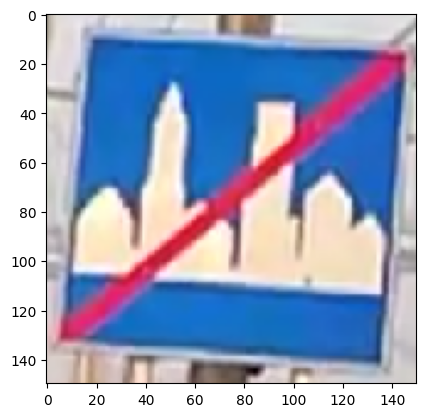

In [5]:
plt.figure()
plt.imshow(data_train[5000])
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_train, labels_train, test_size = 0.2, random_state = 50)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5698, 150, 150, 3) (1425, 150, 150, 3) (5698,) (1425,)


In [7]:
# # resize value (0-255) to (0-1) on X_train, X_test
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# #one-hot encoding the labels
# y_train_one_hot = to_categorical(y_train, classes)
# y_test_one_hot = to_categorical(y_test, classes)
# print(y_train_one_hot.shape, y_test_one_hot.shape)

(5698, 150, 150, 3) (1425, 150, 150, 3) (5698,) (1425,)


In [8]:
model = load_model(model_path + '/mega_v1.h5')

In [9]:
# Lấy ra các layer trừ layer cuối cùng
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
print(feature_extractor)
# Tính toán đặc trưng cho dữ liệu huấn luyện
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)
val_features = feature_extractor.predict(data_val)

35/35 [==============================] - 17s 475ms/step


In [10]:
train_features.shape

(5698, 4096)

SVM MODEL

In [16]:
clf_SVM = svm.SVC(kernel='linear', C=1.0)
clf_SVM.fit(train_features, y_train)

SVC(kernel='linear')

In [17]:
y_pred_test_svm = clf_SVM.predict(test_features)
score_test_svm = accuracy_score(y_test, y_pred_test_svm)
print(score_test_svm)
matrix_test_svm = confusion_matrix(y_test, y_pred_test_svm)
print(matrix_test_svm)

0.9950877192982456
[[ 94   0   0   0   0   0   0   0   0   0   0]
 [  0 405   0   0   0   0   0   0   0   0   0]
 [  0   1 281   0   0   0   0   0   0   0   0]
 [  0   0   0  57   0   1   0   0   0   0   0]
 [  0   0   0   0  37   0   0   0   0   0   0]
 [  0   0   0   0   0  61   0   0   0   0   0]
 [  0   0   0   0   0   0  33   0   0   0   0]
 [  0   0   0   1   0   0   0  48   0   0   0]
 [  0   0   0   0   0   0   0   0 209   0   0]
 [  0   0   0   0   0   0   0   0   0 150   2]
 [  0   1   0   0   0   0   0   0   0   1  43]]


In [18]:
y_pred_val_svm = clf_SVM.predict(val_features)
score_val_svm = accuracy_score(labels_val, y_pred_val_svm)
print(score_val_svm)
matrix_val_svm = confusion_matrix(labels_val, y_pred_val_svm)
print(matrix_val_svm)

0.9678899082568807
[[ 70   0   0   0   0   0   0   0   0   0   0]
 [  2 331   3   0   0   0   0   0   1   0   0]
 [  1   4 225   0   0   0   0   0   0   2   0]
 [  7   0   0  30   4   1   0   0   0   1   1]
 [  1   0   0   0  33   0   0   0   0   0   0]
 [  0   0   4   0   0  35   0   1   0   0   0]
 [  0   0   0   0   0   0  28   1   0   0   0]
 [  0   0   0   0   0   0   0  36   0   0   0]
 [  0   0   0   0   0   0   0   0 142   0   0]
 [  1   0   0   0   0   0   0   0   0  93   0]
 [  0   0   0   0   0   0   0   0   0   0  32]]


BAYES MODEL

In [19]:
clf_bayes = GaussianNB()
clf_bayes.fit(train_features, y_train)

GaussianNB()

In [20]:
y_pred_test_bayes = clf_bayes.predict(test_features)
score_test_bayes = accuracy_score(y_test, y_pred_test_bayes)
print(score_test_bayes)
matrix_test_bayes = confusion_matrix(y_test, y_pred_test_bayes)
print(matrix_test_bayes)

0.992280701754386
[[ 94   0   0   0   0   0   0   0   0   0   0]
 [  0 402   3   0   0   0   0   0   0   0   0]
 [  0   0 282   0   0   0   0   0   0   0   0]
 [  0   0   0  57   0   1   0   0   0   0   0]
 [  0   0   0   0  37   0   0   0   0   0   0]
 [  0   0   1   0   0  60   0   0   0   0   0]
 [  0   0   0   0   0   0  33   0   0   0   0]
 [  0   0   0   1   0   0   0  48   0   0   0]
 [  0   0   0   0   0   0   0   0 209   0   0]
 [  0   0   0   0   0   0   0   0   0 150   2]
 [  0   1   0   1   0   0   0   0   0   1  42]]


In [21]:
y_pred_val_bayes = clf_bayes.predict(val_features)
score_val_bayes = accuracy_score(labels_val, y_pred_val_bayes)
print(score_val_bayes)
matrix_val_bayes = confusion_matrix(labels_val, y_pred_val_bayes)
print(matrix_val_bayes)

0.9779816513761468
[[ 69   0   0   0   0   0   0   0   1   0   0]
 [  1 335   1   0   0   0   0   0   0   0   0]
 [  0  10 221   0   0   0   0   0   0   1   0]
 [  0   0   0  43   0   0   0   0   0   1   0]
 [  0   0   0   0  34   0   0   0   0   0   0]
 [  0   0   4   2   0  34   0   0   0   0   0]
 [  0   0   1   0   0   0  28   0   0   0   0]
 [  0   0   0   0   0   0   0  36   0   0   0]
 [  0   2   0   0   0   0   0   0 140   0   0]
 [  0   0   0   0   0   0   0   0   0  94   0]
 [  0   0   0   0   0   0   0   0   0   0  32]]


RANDOM FOREST MODEL

In [37]:
clf_random_forest = RandomForestClassifier(n_estimators=100, max_depth=11, 
                              min_samples_split=10, 
                              min_samples_leaf=10, 
                              max_features=2000)
clf_random_forest.fit(train_features, y_train)

RandomForestClassifier(max_depth=11, max_features=2000, min_samples_leaf=10,
                       min_samples_split=10)

In [38]:
y_pred_test_rf = clf_random_forest.predict(test_features)
score_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(score_test_rf)
matrix_test_rf = confusion_matrix(y_test, y_pred_test_rf)
print(matrix_test_rf)

0.9901754385964913
[[ 93   1   0   0   0   0   0   0   0   0   0]
 [  0 404   1   0   0   0   0   0   0   0   0]
 [  0   2 280   0   0   0   0   0   0   0   0]
 [  0   0   0  57   0   1   0   0   0   0   0]
 [  1   0   0   0  36   0   0   0   0   0   0]
 [  0   0   1   0   0  60   0   0   0   0   0]
 [  0   1   0   0   0   0  32   0   0   0   0]
 [  0   0   0   0   0   0   1  48   0   0   0]
 [  0   0   0   0   0   0   0   0 209   0   0]
 [  0   1   0   0   0   0   0   0   0 149   2]
 [  0   1   0   0   0   0   0   0   0   1  43]]


In [39]:
y_pred_val_rf = clf_random_forest.predict(val_features)
score_val_rf = accuracy_score(labels_val, y_pred_val_rf)
print(score_val_rf)
matrix_val_rf = confusion_matrix(labels_val, y_pred_val_rf)
print(matrix_val_rf)

0.9293577981651376
[[ 69   0   0   0   0   0   0   0   1   0   0]
 [  0 334   2   0   0   0   0   0   1   0   0]
 [  0   5 225   0   0   0   0   0   2   0   0]
 [ 14   0   0  27   0   0   0   0   1   2   0]
 [ 13   0   2   0  12   0   0   0   0   7   0]
 [  0   3   4   2   0  31   0   0   0   0   0]
 [  0   0   4   0   0   0  15   2   0   5   3]
 [  0   0   0   0   0   0   0  36   0   0   0]
 [  0   0   0   0   0   0   0   0 142   0   0]
 [  0   0   0   0   0   0   0   0   0  94   0]
 [  1   0   2   0   0   0   0   0   0   1  28]]
